<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Design_File_System_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Design File System

You are asked to design a file system that allows you to create new paths and associate them with different values.

The format of a path is one or more concatenated strings of the form: / followed by one or more lowercase English letters. For example, "/leetcode" and "/leetcode/problems" are valid paths while an empty string "" and "/" are not.

Implement the FileSystem class:

- bool createPath(string path, int value) Creates a new path and associates a value to it if possible and returns true. Returns false if the path already exists or its parent path doesn't exist.
- int get(string path) Returns the value associated with path or returns -1 if the path doesn't exist.

Example 1:

```

Input: 
["FileSystem","createPath","get"]
[[],["/a",1],["/a"]]
Output: 
[null,true,1]
Explanation: 
FileSystem fileSystem = new FileSystem();

fileSystem.createPath("/a", 1); // return true
fileSystem.get("/a"); // return 1
```



Example 2:

```
Input: 
["FileSystem","createPath","createPath","get","createPath","get"]
[[],["/leet",1],["/leet/code",2],["/leet/code"],["/c/d",1],["/c"]]
Output: 
[null,true,true,2,false,-1]
Explanation: 
FileSystem fileSystem = new FileSystem();

fileSystem.createPath("/leet", 1); // return true
fileSystem.createPath("/leet/code", 2); // return true
fileSystem.get("/leet/code"); // return 2
fileSystem.createPath("/c/d", 1); // return false because the parent path "/c" doesn't exist.
fileSystem.get("/c"); // return -1 because this path doesn't exist.
```



Constraints:

```

fileSystem.createPath("/a", 1); // return true
fileSystem.get("/a"); // return 1
Example 2:

Input: 
["FileSystem","createPath","createPath","get","createPath","get"]
[[],["/leet",1],["/leet/code",2],["/leet/code"],["/c/d",1],["/c"]]
Output: 
[null,true,true,2,false,-1]
Explanation: 
FileSystem fileSystem = new FileSystem();

fileSystem.createPath("/leet", 1); // return true
fileSystem.createPath("/leet/code", 2); // return true
fileSystem.get("/leet/code"); // return 2
fileSystem.createPath("/c/d", 1); // return false because the parent path "/c" doesn't exist.
fileSystem.get("/c"); // return -1 because this path doesn't exist.
 

Constraints:

The number of calls to the two functions is less than or equal to 104 in total.
2 <= path.length <= 100
1 <= value <= 109
```



In [1]:

# The TrieNode data structure.
class TrieNode(object):
    def __init__(self, name):
        self.map = {}
        self.name = name
        self.value = -1

class FileSystem:
    
    # space = O(T^2)
    def __init__(self):
        self.root = TrieNode("")
    
    # time = O(T)
    # space = O(T)
    # T = component in path
    def createPath(self, path: str, value: int) -> bool:
        components = path.split("/")
        cur = self.root
        
        for i in range(1, len(components)):
            name = components[i]
            
            if name not in cur.map:
                if i == len(components) - 1:
                    cur.map[name] = TrieNode(name)
                else:
                    return False
            cur = cur.map[name]
        
        if cur.value != -1:
            return False
        
        cur.value = value
        return True
    
    # time = O(T)
    # space = O(1)
    def get(self, path: str) -> int:
        cur = self.root
        components = path.split("/")
    
        for i in range(1, len(components)):
            name = components[i]
            if name not in cur.map:
                return -1
            cur = cur.map[name]
            
        return cur.value

In [2]:
file_system = FileSystem()
print(file_system.createPath("/leet", 1))
print(file_system.createPath("/leet/code", 2))
print(file_system.get("/leet/code"))
print(file_system.createPath("/c/d",1))
print(file_system.get("/c"))

True
True
2
False
-1


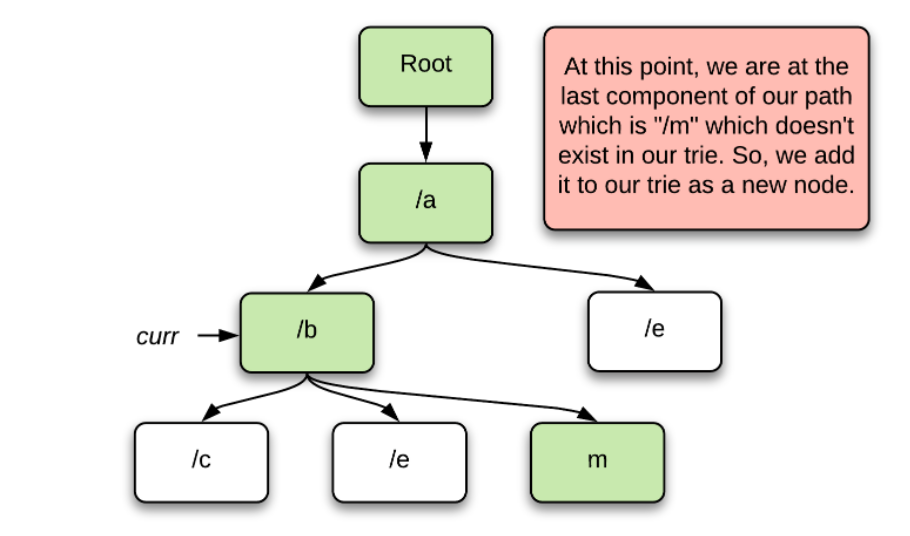